# 0. 데이터 설명

In [3]:
import tensorflow

In [4]:
import keras

In [5]:
from keras.datasets import mnist #mnist : 이미지 픽셀 데이터

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train[1] #첫번째 데이터 불러오기

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
X_train.shape
# 손글씨 데이터
# 60000개의 이미지
# 사이즈 28*28

(60000, 28, 28)

## 이미지 visualizatiion

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

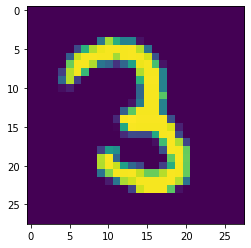

In [11]:
first_letter=X_train[198]
plt.imshow(first_letter)
plt.show()

In [12]:
y_train[198]

3

In [13]:
y_train.shape

(60000,)

# 1. Pre-processing
    - 1. x전처리
       - x: 60000*28*28 -> 60000*784
       - input은 이미지(matrix) 그자체이기 때문에 function f에 넣으려면 전처리 과정이 필요함.
    - 2. y전처리
        - mutiple class를 binary class(5->1, 5x->0) 바꿔야함 

In [14]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [15]:
X_train.shape
X_test.shape

(10000, 784)

In [16]:
y_train_5 = (y_train==5) #y_train가 5이면 true 아니면 false
y_test_5 = (y_test==5) #y_test가 5이면 true 아니면 false

In [17]:
y_train_5[198]

False

# 2. Classification
   - (X_train, y_train_5) 학습
   - (X_test) 예측

In [18]:
#SGD:losistic regression을 schatotistic을 이용해서 estimate를 구하는 방법
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf=SGDClassifier()

In [20]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [21]:
y_test[1] # test 데이터 셋의 첫번째 레이블이 2이므로 5가 아님(false)

2

In [22]:
sgd_clf.predict([X_test[1,]]) # 예측 값은 false (5가 아님)

array([False])

In [23]:
# sgd_clf.predict(some_digit.reshape(1,28*28))

## #Imbalaced classification
- size 균형이 맞지 않는 경우 (1~9까지 mutiple class일때 5를 기준으로 binary로 바꾸면 사이즈가 약 1:9로 바뀜)
- (실제)예측률 현저히 떨어짐 -> 모두 0으로 예측할수 있음
- but, imbalance 한 경우에도 예측률이 높게 나오는 경우가 있으므로(사이즈가 1:9에서 9인 경우) 평가지료를 accuracy로 무조건 잡지 않는다

- *balance된 경우에는 평가지표로 accuracy를 사용해도 무방하나, imbalance된 경우에는 평가지표로 recall, precision, F1-score을 사용하는 것이 좋다*

5- cross validation SDG linear model의 정확도(accuracy)평가

In [24]:
# 전체 데이터에 대해서 학습
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.96908333, 0.96316667, 0.963     , 0.96825   , 0.96841667])

In [25]:
from sklearn.base import BaseEstimator

In [26]:
import numpy as np

In [27]:
#fit 없이 무조건 0으로 prediction한다
class Never5Classifier (BaseEstimator) : 
    def fit(self,X, y=None) : 
        pass
    def predict(self,X) :
        return np.zeros((len(X),1),dtype=bool)

In [28]:
never_5_clf=Never5Classifier()

In [29]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=5,scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

### NOTE : class size 불균형이 심할때는, classification accuracy 외에도 recall, precision, f1-score들을 참조해야한다

- recall(재현율) : postive 중에서 예측이 얼마나 잘 됐는지
- precision(정밀도) : positive로 예측된 것 중에서 실제 positive가 잘 맞는지
- f1-score : recall과 precision의 조화평균
    - **recall과 precision은 trade off이다**
        - 임계값을 낮추게 된다는 것은 그만큼 모델이 Positive라고 예측하는 횟수가 많아진다는 것과 동일한 의미이다. 재현율의 의미는 실제값이 Positive인데 모델이 Positive로 예측한 비율이다. 따라서 분모의 FN(실제값이 Positive인데 모델이 Negative라고 예측한 횟수) 값이 낮아질 수 밖에 없다. 따라서 임계값을 낮추게 되면 재현율은 커진다.
        - 반대로 정밀도는 모델이 Positive 라고 예측했을 때 실제값이 Positive인 비율이다. 그래서 분모의 FP(모델이 Positive라고 예측했을 때 실제값이 Negative인 횟수) 값이 커지게 된다. 따라서 임계값을 낮추게 되면 정밀도는 작아지게 된다.

### Confusion Matrix

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=5)

In [32]:
## prediction -> confusion matrix
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train_5,y_train_pred)

array([[54069,   510],
       [ 1610,  3811]], dtype=int64)

In [34]:
from sklearn.metrics import recall_score, precision_score

In [35]:
recall_score(y_train_5,y_train_pred)

0.7030068253089836

In [36]:
precision_score(y_train_5,y_train_pred)

0.8819717657949548

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.782385547115582

In [38]:
y_test[9998]

5

In [39]:
y_scores = sgd_clf.decision_function([X_test[9998,]])

In [40]:
y_scores

array([7472.7312871])

In [41]:
threshold = 0 #임계치
y_pred = (y_scores>threshold)

In [42]:
y_pred

array([ True])

In [43]:
## thershold가 커지면 음성, 작아지면 양성

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [45]:
y_scores

array([   349.75531433, -15311.44322153, -23757.34075305, ...,
         8380.9247123 ,  -4943.63656748, -11154.32867902])

In [46]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

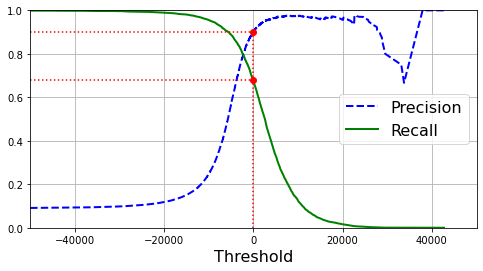

In [61]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown                                            # Not shown
plt.show()

- recall과 precision이 서로 trade off 관계이다
- 적절한 임계값(threshold)는 그때그때 다르다..

# ROC curve

In [1]:
from sklearn.metrics import roc_curve

In [47]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

In [48]:
fpr # false positive rate

array([0.        , 0.        , 0.        , ..., 0.99655545, 0.99655545,
       1.        ])

In [49]:
tpr # true positive rate

array([0.00000000e+00, 1.84467810e-04, 7.00977679e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [50]:
thresholds

array([  53053.41196847,   53052.41196847,   31009.1582404 , ...,
        -72323.90927259,  -72371.0094801 , -166490.99004368])

In [51]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

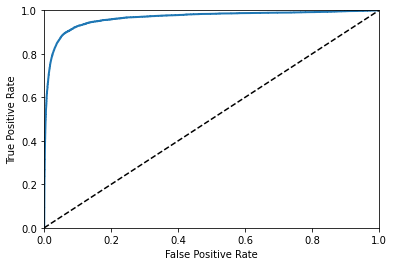

In [52]:
plot_roc_curve(fpr,tpr)

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score(y_train_5,y_scores)

0.9649047582646836

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
forest_clf=RandomForestClassifier(random_state=42)

In [57]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=5,method='predict_proba')

In [58]:
y_probas_forest # 0번재 칼럼->5가 아닐 확률, 1번째 칼럼-> 5일 확률

array([[0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.96, 0.04]])

In [59]:
y_scores_forest=y_probas_forest[:,1] # 1번째 칼럼을 score로 쓴다

In [60]:
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5,y_scores_forest)

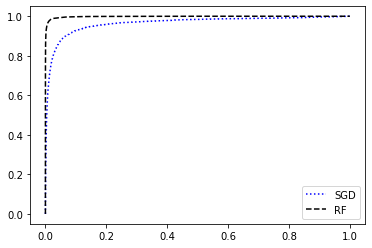

In [61]:
plt.plot(fpr,tpr,'b:',label='SGD') # SGD ROC 
plt.plot(fpr_forest,tpr_forest,'k--',label='RF') # RF ROC 
plt.legend(loc='lower right')

In [62]:
roc_auc_score(y_train_5,y_scores_forest)

0.998402186461512

## SGD classifier 의 classification performance? accuracy

In [64]:
cross_val_score(sgd_clf,X_train,y_train,cv=5,scoring='accuracy')

array([0.84425   , 0.85958333, 0.87475   , 0.87175   , 0.8555    ])

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler=StandardScaler() # (x-mu)/std

In [67]:
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))

In [68]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=5,scoring='accuracy')

C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.8975    , 0.892     , 0.89316667, 0.89575   , 0.90408333])

## Error analysis
- multiclass로 돌림

In [69]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [70]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [71]:
conf_mx

array([[5581,    0,   17,    7,    9,   41,   36,    6,  225,    1],
       [   0, 6413,   42,   23,    3,   42,    4,    8,  196,   11],
       [  27,   27, 5244,   88,   69,   24,   65,   41,  362,   11],
       [  26,   16,  109, 5223,    0,  190,   26,   40,  435,   66],
       [  10,   14,   44,   10, 5206,   10,   38,   21,  335,  154],
       [  26,   18,   31,  160,   52, 4450,   82,   14,  527,   61],
       [  28,   16,   42,    2,   40,   91, 5559,    8,  132,    0],
       [  18,   13,   55,   30,   47,   14,    4, 5696,  191,  197],
       [  14,   61,   41,   88,    4,  120,   29,    8, 5448,   38],
       [  22,   19,   33,   57,  118,   35,    1,  175,  380, 5109]],
      dtype=int64)

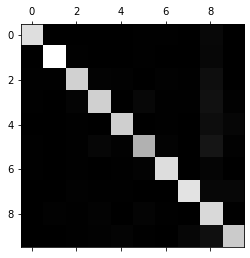

In [72]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

- 색이 흐리면 분류가 잘 안된것

In [73]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [74]:
norm_conf_mx

array([[9.42258990e-01, 0.00000000e+00, 2.87016715e-03, 1.18183353e-03,
        1.51950025e-03, 6.92216782e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.51201424e-01, 6.22960546e-03, 3.41145061e-03,
        4.44971818e-04, 6.22960546e-03, 5.93295758e-04, 1.18659152e-03,
        2.90714921e-02, 1.63156333e-03],
       [4.53172205e-03, 4.53172205e-03, 8.80161128e-01, 1.47700571e-02,
        1.15810675e-02, 4.02819738e-03, 1.09097012e-02, 6.88150386e-03,
        6.07586438e-02, 1.84625713e-03],
       [4.24074376e-03, 2.60968847e-03, 1.77785027e-02, 8.51900179e-01,
        0.00000000e+00, 3.09900506e-02, 4.24074376e-03, 6.52422117e-03,
        7.09509052e-02, 1.07649649e-02],
       [1.71174255e-03, 2.39643958e-03, 7.53166724e-03, 1.71174255e-03,
        8.91133174e-01, 1.71174255e-03, 6.50462170e-03, 3.59465936e-03,
        5.73433756e-02, 2.63608353e-02],
       [4.79616307e-03, 3.32042059e-03, 5.71850212e-03, 2.95148497e-02,
   

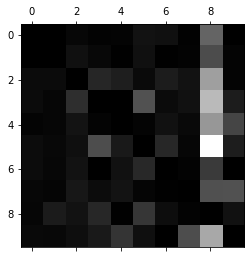

In [75]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [76]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

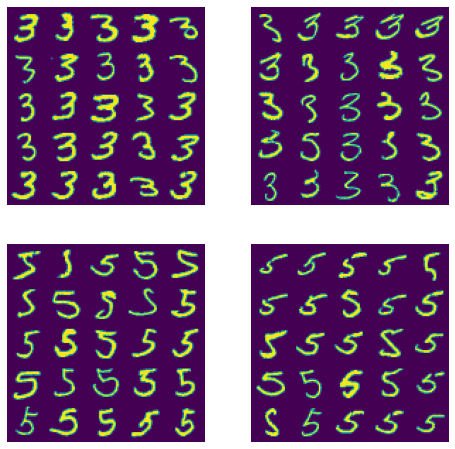

In [77]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] #3인데 5로 예측한거
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

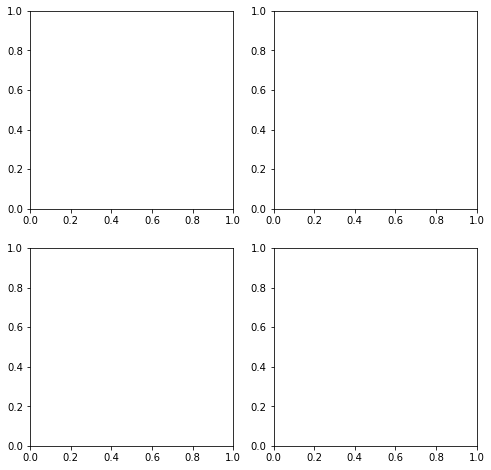

In [78]:
cl_a, cl_b = 4, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))

plt.subplot(221); #plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); #plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); #plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); #plot_digits(X_bb[:25], images_per_row=5)
plt.show()